In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [86]:
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [87]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Snaking the column names

In [88]:
customer_df.columns = customer_df.columns.str.lower()
        
customer_df.columns = customer_df.columns.str.replace(' ','_')

customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### Date format :

In [89]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


In [90]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### We don't have any nulls

In [91]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [92]:
customer_df['months_since_policy_inception'].value_counts()

59    142
61    128
50    125
44    115
10    114
     ... 
16     70
96     67
82     56
98     54
97     52
Name: months_since_policy_inception, Length: 100, dtype: int64

### Separating numerical into discrete and continuous

In [ ]:
# I decided that columns that had less than 10 unique values where discrete based on the columns that we have

In [93]:
numerical = customer_df.select_dtypes(np.number)

discrete_lst = []
continuous_lst = []

for col in numerical.columns:
        if len(customer_df[col].unique())<=10 :
            discrete_lst.append(col)
        else :
            continuous_lst.append(col)

print(discrete_lst)
print(continuous_lst)

discrete = customer_df.filter(discrete_lst).copy()
discrete.head()

continuous = customer_df.filter(continuous_lst).copy()
continuous.head()

['number_of_open_complaints', 'number_of_policies']
['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'total_claim_amount']


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [94]:
discrete.head()

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


In [95]:
categorical = customer_df.select_dtypes(object)
categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Checking the categorical data : its A-ok :)        (all values are unique and meaningful)

In [121]:
def is_unique(categoricals):
    for col in categoricals.columns:
        if len(categoricals[col].unique())<=10:
            print(col,(categoricals[col].unique()))
    return

is_unique(categorical)

state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response [0 1]
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Higher Education' 'High School or Below']
employmentstatus ['Employed' 'Unemployed' 'Other']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy ['L3' 'L2' 'L1']
renew_offer_type ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Sport/Luxury']
vehicle_size ['Medsize' 'Small' 'Large']


In [ ]:
# droping customer id because it's useless basically

In [99]:
categorical = categorical.drop('customer', axis=1)
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


#### Look : a beautiful correlation matrix and its heatmap !

In [100]:
corrMatrix = numerical.corr()
corrMatrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


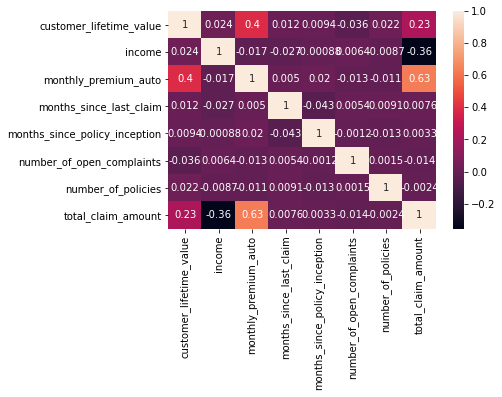

In [101]:
sns.heatmap(corrMatrix, annot=True, )
plt.show()

In [ ]:
# no high correlation that we would want to drop

### Create a function to plot every discrete variables.

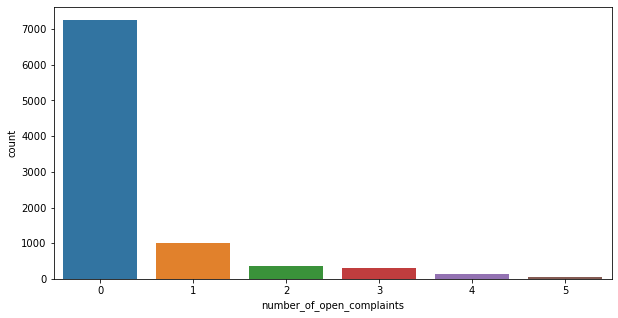

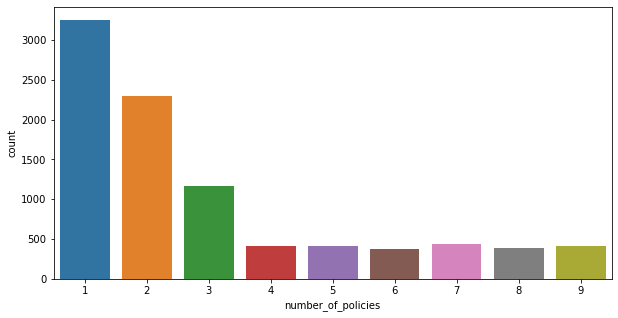

In [102]:
 for col in discrete.columns :    
    plt.figure(figsize=(10,5))
    sns.countplot(x = col, data=discrete)
    plt.show()    

### Create a function to plot every continuous variables.

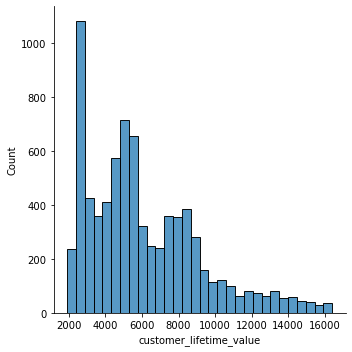

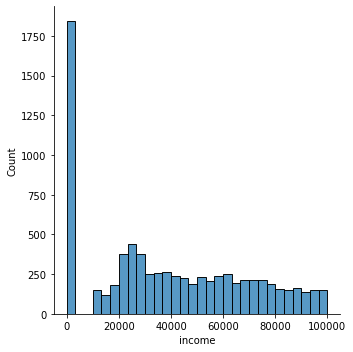

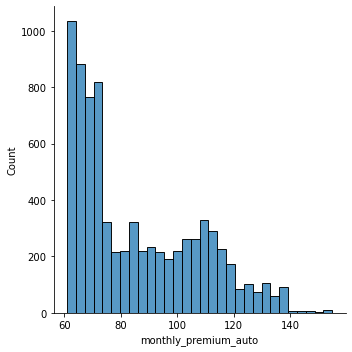

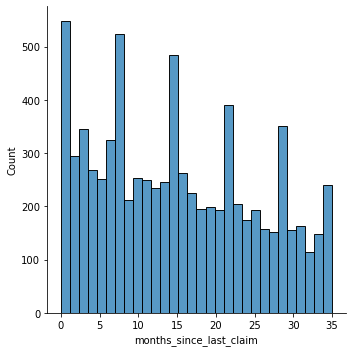

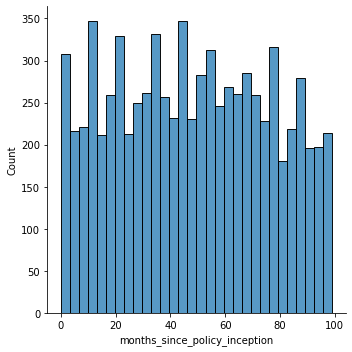

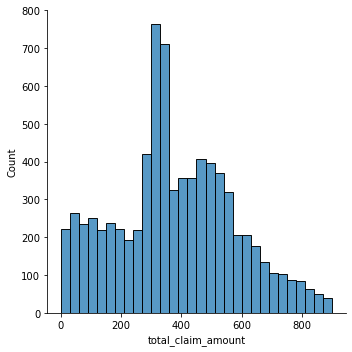

In [122]:
for data in continuous.columns :
    sns.displot(continuous[data], bins=30)
    plt.show()

### Create a function to plot every categorical variables.

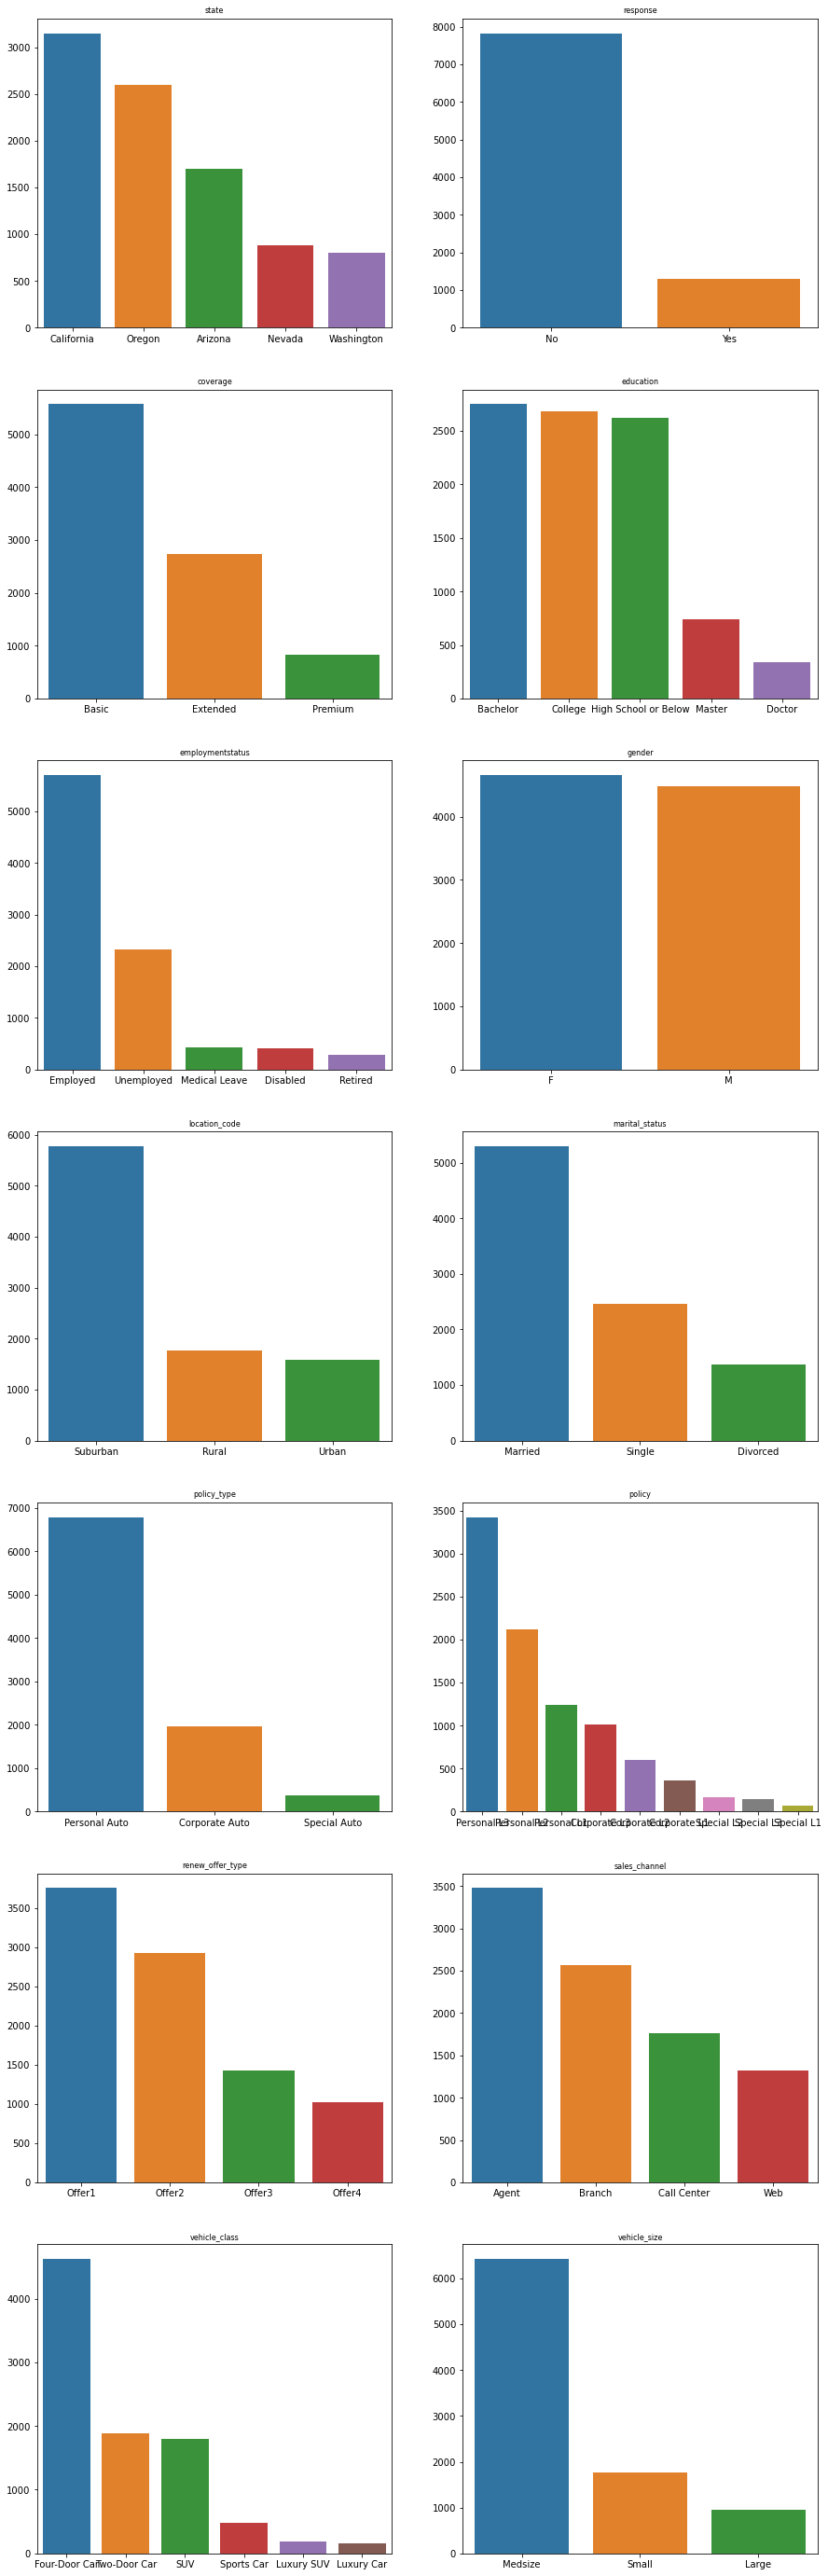

In [104]:
f, axes = plt.subplots(int(categorical.shape[1]/2),2, figsize =(15,50))
for i, col in enumerate(categorical):
    sns.barplot(x=categorical[col].value_counts().index,
                y= categorical[col].value_counts(),
                ax = axes[int(i/2)][int(i)%2])
    axes[int(i/2)][int(i)%2].set_title(col,fontsize = 8)
    axes[int(i/2)][int(i)%2].set_ylabel('')

In [123]:
### Now on to cleaning the categorical variables : bringing some values together and creating a boolean for others

In [105]:
categorical['response'] = np.where(categorical['response'] == 'Yes', 1, 0)

In [106]:
def clean_employmentstatus(x) :
    if x in ['Medical Leave','Disabled', 'Retired']:
        return 'Other'
    else:
        return x
    
categorical['employmentstatus'] = categorical['employmentstatus'].apply(clean_employmentstatus)

<AxesSubplot:ylabel='employmentstatus'>

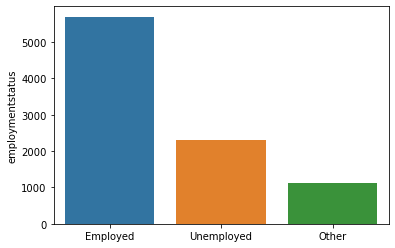

In [107]:
sns.barplot(x=categorical['employmentstatus'].value_counts().index,
                y= categorical['employmentstatus'].value_counts())

In [108]:
def clean_policy(x) :
    if 'L1' in x :
        return 'L1'
    elif 'L2' in x :
        'L2' in x
        return 'L2'
    else :
        return'L3'
    
categorical['policy'] = categorical['policy'].apply(clean_policy)

<AxesSubplot:ylabel='policy'>

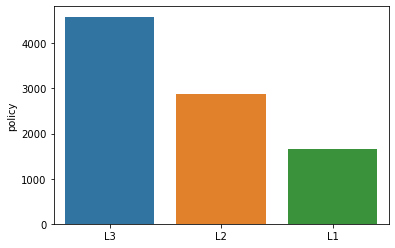

In [109]:
sns.barplot(x=categorical['policy'].value_counts().index,
                y= categorical['policy'].value_counts())

In [110]:
def clean_class(x) :
    if x in ['Sports Car','Luxury SUV', 'Luxury Car']:
        return 'Sport/Luxury'
    else:
        return x
    
categorical['vehicle_class'] = categorical['vehicle_class'].apply(clean_class)

<AxesSubplot:ylabel='vehicle_class'>

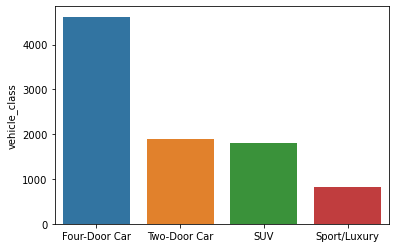

In [111]:
sns.barplot(x=categorical['vehicle_class'].value_counts().index,
                y= categorical['vehicle_class'].value_counts())

<AxesSubplot:ylabel='education'>

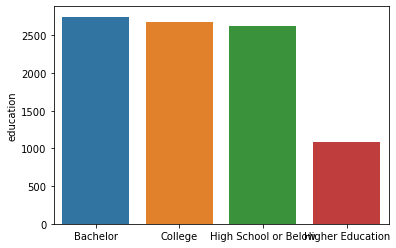

In [112]:
def clean_education(x) :
    if x in ['Master','Doctor']:
        return 'Higher Education'
    else:
        return x
    
categorical['education'] = categorical['education'].apply(clean_education)

sns.barplot(x=categorical['education'].value_counts().index,
                y= categorical['education'].value_counts())

### Showing outliers

customer_lifetime_value


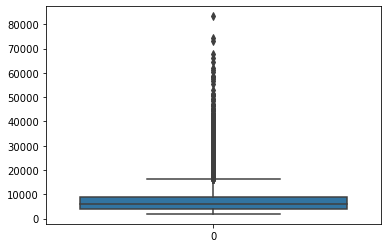

income


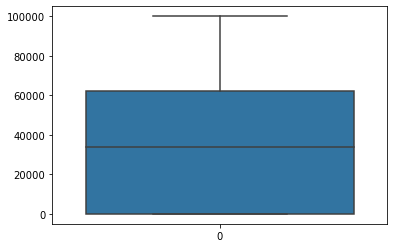

monthly_premium_auto


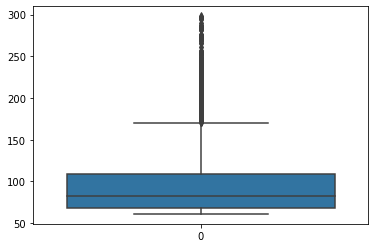

months_since_last_claim


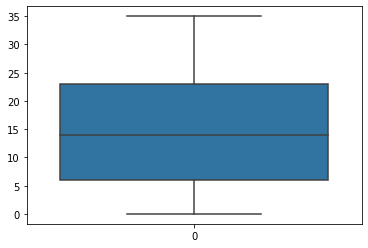

months_since_policy_inception


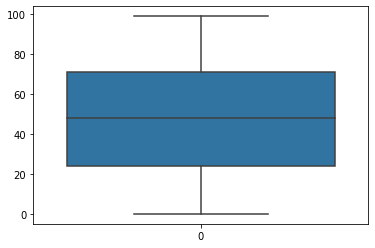

total_claim_amount


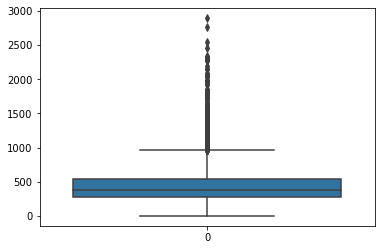

In [113]:
for col in continuous.columns :
    sns.boxplot(data = continuous[col])
    print(col)
    plt.show()


### Getting rid of outliers

In [114]:
iqr = np.percentile(continuous['customer_lifetime_value'],75) - np.percentile(continuous['customer_lifetime_value'],25)
upper_limit = np.percentile(continuous['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)
continuous = continuous[continuous['customer_lifetime_value'] < upper_limit]

16414.039911750002


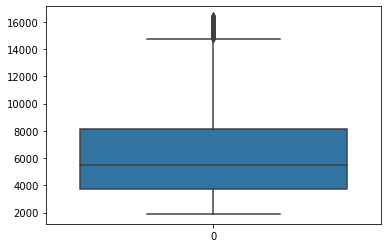

In [115]:
sns.boxplot(data = continuous['customer_lifetime_value'])
plt.show()

155.5


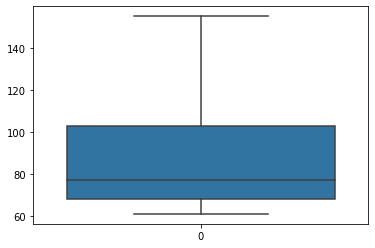

In [119]:
iqr = np.percentile(continuous['monthly_premium_auto'],75) - np.percentile(continuous['monthly_premium_auto'],25)
upper_limit = np.percentile(continuous['monthly_premium_auto'],75) + 1.5*iqr
print(upper_limit)
continuous = continuous[continuous['monthly_premium_auto'] < upper_limit]
sns.boxplot(data = continuous['monthly_premium_auto'])
plt.show()

902.6758414999999


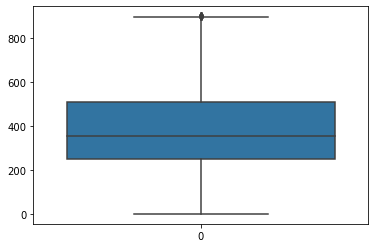

In [120]:
iqr = np.percentile(continuous['total_claim_amount'],75) - np.percentile(continuous['total_claim_amount'],25)
upper_limit = np.percentile(continuous['total_claim_amount'],75) + 1.5*iqr
print(upper_limit)
continuous = continuous[continuous['total_claim_amount'] < upper_limit]
sns.boxplot(data = continuous['total_claim_amount'])
plt.show()